## Tarea: General case: technology and demographic change (TAREA: semana 27 con nota)

Part 1. Consider a production function $A_tF(K_t,L_t)=A_tK_t^\alpha L_t^{1-\alpha}$. With a productivity growth rate of g.This allows us some conveniences for the stationary model. Therefore, the capital motion law is:

$$K_{t+1}=(1-\delta)K_t + sA_tF(K_t,L_t)$$

Using $\frac{A_{t+1}-A_t}{A_t}=g$ and $\frac{L_{t+1}-L_t}{L_t}=n$ and considering $k_t=\frac{K_t}{A_tL_t}$
1. Derive a theoretical function for $k_{t+1}=g(k_{t})$ where $g(k_{t})$ also depends on $n$ and $g$
2. Derive a theoretical function for the steady state of capital such tha $k^*=h(k^*)$ whereh$k^*$ also depends on $n$ and $g$
3. Write a function in Julia to determine  $k_{t+1}=g(k_{t})$ for any grid of $k_t$ and any set of coefficients (use the ones in the lectures)
4. Write a function in Julia to determine the steady state of $k^*=h(k^*)$. 
5. Simulate in Julia  $k_{t+1}=g(k_{t})$ and TEST it converges to the value predicted by $h(k^*)$.
6. Using  $k_{t+1}=g(k_{t})$ in 3, simulate convergence over time for different values of initial capital $k_0$
7. Using  $k_{t+1}=g(k_{t})$ in 3, simulate convergence over time for different values of initial capital $k_0$ assesing the implications of different values of $n$, more specifically, $n=0, n=0.1, n=1$. Explain the intution



# Respuesta 1.

Usando $\frac{A_{t+1}-A_t}{A_t}=g$ y $\frac{L_{t+1}-L_t}{L_t}=n$ tenemos:
$$\frac{A_{t+1}}{A_{t+1}} \frac{L_{t+1}}{L_{t+1}} \frac{K_{t+1}}{A_tL_t}=(1-\delta) \frac{K_t}{A_tL_t}+ \frac{sA_t(Fk_t,L_t)}{A_tL_t}$$
$$(1+g+n)k_{t+1}=(1-\delta)K_t+ sF(k_t,1)$$
$$k_{t+1}=\frac{(1-\delta)K_t+ sF(K_t,1)}{1+g+n}$$
Si $F(K_t,1)=k_t^\alpha$, tenemos:
$$k_{t+1}=\frac{(1-\delta)k_t+ sk_t^\alpha}{1+g+n}=g(k_t)$$

# Respuesta 2.

Usando $k_{t+1}=\frac{(1-\delta)k_t+ sk_t^\alpha}{1+g+n}=g(k_t)$ obtenido en 1. y teniendo en cuenta que en estado estacionario $k_t=k_{t+1}=k^*$, tenemos:
$$k^*=\frac{(1-\delta)k^*+ sk^{*\alpha}}{1+g+n}=g(k_t)$$
$$k^*(g+n+\delta)=sk^{*\alpha}$$
$$\frac{k^*}{k^{*\alpha}}=\frac{s}{g+n+\delta}$$
$$k^*=(\frac{s}{g+n+\delta})^{1-\alpha}$$

# Respuesta 3.

Para el siguiente apartado, utilizaremos como base el codigo proporcionado en clases:

In [255]:
using Plots, Parameters

function params(; A=2.0, s=0.3, α=0.3, δ=0.4, x0=0.25, kmin=0.0, kmax=3.0, N=10_000,
                  g=0.01,n=0.01 ) #se agrega el parametro n con un numero arbitrario, en este caso igual a g#
    kgrid = range(kmin, kmax, length=N)
    t = range(1,100, N)
    return (A=A, s=s, α=α, δ=δ, x0=x0, kmin=kmin, kmax=kmax, kgrid=kgrid, t=t, g=g, n=n)
end


function g(p, k)
    @unpack A, s, α, δ = p
    return A * s * k.^α + (1 - δ) * k
end

function kstar(p)
    @unpack s, A, δ, α = p
    return ((s * A) / δ)^(1/(1 - α))
end

kstar (generic function with 1 method)

Posteriormente, procedemos a realizar la edición del mismo según se va solicitando:

In [256]:
function g3(p, k)
    @unpack A, s, α, δ, g, n = p
    return ((1 .- δ).* k .+ s .* k.^α ) ./ (1 .+ g .+ n)
end

g3 (generic function with 1 method)

# Respuesta 4.

Seguimos utilizando lo desarrollado en la pregunta anterior, seún se solicita en enunciado:

In [257]:
function kstar4(p)
    @unpack A, s, α, δ, g, n = p
    return (s ./ (δ .+ n .+ g) ).^(1/(1 .- α))
end

kstar4 (generic function with 1 method)

# Respuesta 5.

Para probar que las funciones definidas si convergen al estado estacionario, primero calculamos el valor del mismo:

In [258]:
p = params()

k_star = kstar4(p)
println("El estado estacionario k* es $k_star")

El estado estacionario k* es 0.6183660866150926


Luego, aunque no es solicitado, se realiza el gráfico respectivo para visualizar mejor:

In [259]:
p = params()
kgrid = p.kgrid
g_values = g3(p, kgrid)
ks = kstar4(p);


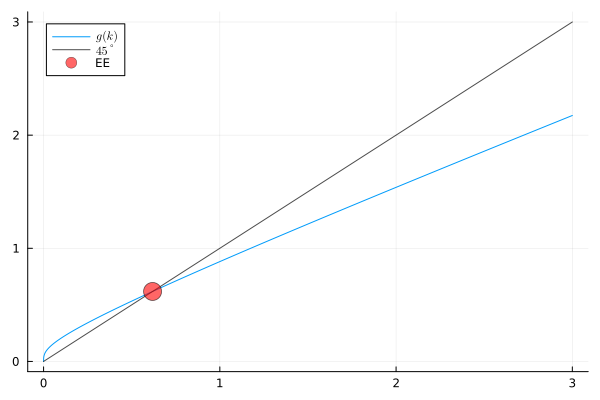

In [260]:
plot(kgrid, g_values, label="\$g(k)\$")
plot!(kgrid, kgrid, color=:black, label="\$45^\\circ\$", lw=1, alpha=0.7)
scatter!([ks], [ks], color=:red, label="EE", ms=10, alpha=0.6)

Finalmente, relizamos la simulación y la graficamos, para poder visualizar como esta converge al EE.

In [261]:
function simulate(p; max_iterations=1000, tolerance=1e-6)
    k_t = p.x0
    k_star = kstar4(p)
    for t in 1:max_iterations
        k_t_next = g3(p, k_t)
        if abs(k_t_next - k_t) < tolerance
            println("Convergió en la iteración $t: k* = $k_t_next")
            return k_t_next
        end
        k_t = k_t_next
    end
    println("No convergió después de $max_iterations iteraciones.")
    return k_t
end

k_converged = simulate(p)
println("El valor de k al que converge es $k_converged")

Convergió en la iteración 36: k* = 0.618363968645511
El valor de k al que converge es 0.618363968645511


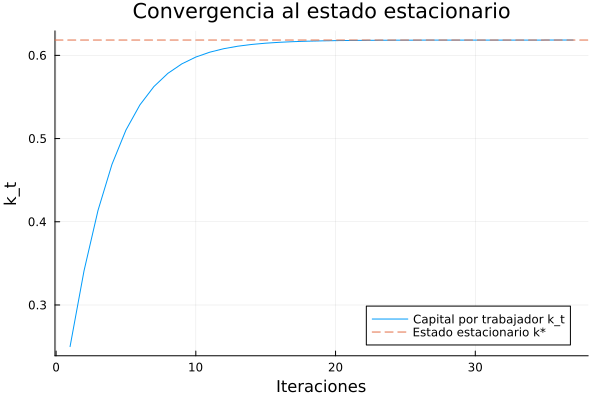

In [262]:
function plot_convergence(p; max_iterations=1000)
    k_t = p.x0
    k_star = kstar4(p)
    k_values = [k_t]
    for t in 1:max_iterations
        k_t = g3(p, k_t)
        push!(k_values, k_t)
        if abs(k_t - k_values[end-1]) < 1e-6
            break
        end
    end
    
    plot(1:length(k_values), k_values, label="Capital por trabajador k_t", xlabel="Iteraciones", ylabel="k_t", title="Convergencia al estado estacionario")
    hline!([k_star], label="Estado estacionario k*", linestyle=:dash)
end


plot_convergence(p)

# Respuesta 6.

A continuación, repetimos el apartado anterior utilizando distintos valores de capital per capita inicial según se solicita en el enunciado:

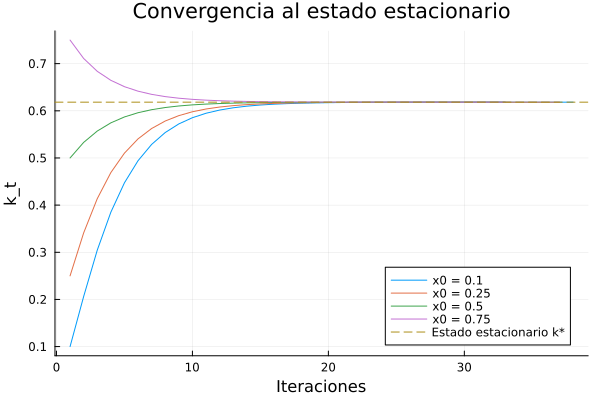

In [263]:
using Plots

function plot_convergence(p; x0_values=[0.1, 0.25, 0.5, 0.75], max_iterations=1000)
    k_star = kstar4(p)
    all_k_values = []
    labels = []
    
    for x0 in x0_values
        k_t = x0
        k_values = [k_t]
        for t in 1:max_iterations
            k_t = g3(p, k_t)
            push!(k_values, k_t)
            if abs(k_t - k_values[end-1]) < 1e-6
                break
            end
        end
        push!(all_k_values, k_values)
        push!(labels, "x0 = $x0")
    end
    
    plot(title="Convergencia al estado estacionario", xlabel="Iteraciones", ylabel="k_t")
    for (k_values, label) in zip(all_k_values, labels)
        plot!(1:length(k_values), k_values, label=label)
    end
    hline!([k_star], label="Estado estacionario k*", linestyle=:dash)
end

 plot_convergence(p)

# Respuesta 7.

Para este apartado final, utilizamos una función vista en clases, para no evaluar según solicita el enunciado:

In [264]:
function plot_convergence(p; x0_values=[0.1, 0.25, 0.5, 0.75], n_values=[0, 0.1, 1], max_iterations=1000)

    k_star = kstar4(p)
    
    for x0 in x0_values
        all_k_values = []
        labels = []
        
        for n in n_values
            p_new = merge(p, (n=n,))
            
            k_t = x0
            k_values = [k_t]
            for t in 1:max_iterations
                k_t = g3(p_new, k_t)
                push!(k_values, k_t)
                if abs(k_t - k_values[end-1]) < 1e-6
                    break
                end
            end
            push!(all_k_values, k_values)
            push!(labels, "n = $n")
        end
        
        plt = plot(title="Convergencia al estado estacionario para x0 = $x0", xlabel="Iteraciones", ylabel="k_t")
        for (k_values, label) in zip(all_k_values, labels)
            plot!(plt, 1:length(k_values), k_values, label=label)
        end
        hline!(plt, [k_star], label="Estado estacionario k*", linestyle=:dash)
        
        display(plt)
        
    end
end

plot_convergence (generic function with 4 methods)

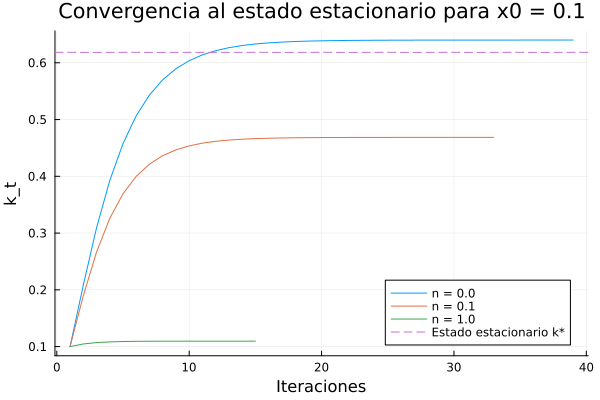

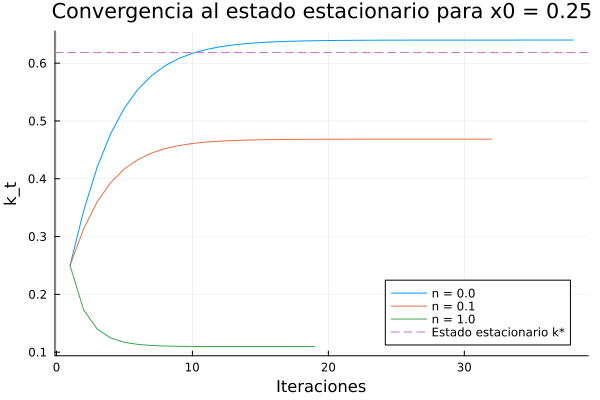

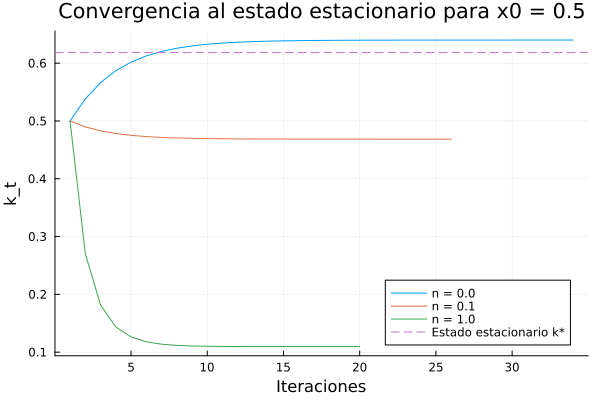

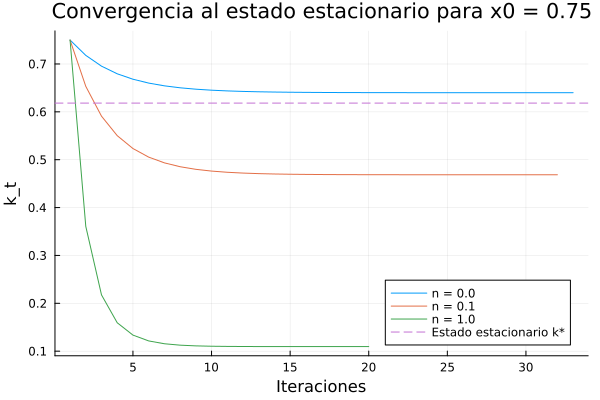

In [265]:
plot_convergence(p)

En base a las simulaciones, podemos llegar a una conlusión intuitiva, que además se ve claramente representada en cada gráfica: a medida que el crecimiento de la población va subiendo, el capital per capita va disminuyendo, dado que la misma cantidad de capital debe repartirse entre un número mayor de personas.

# Conclusiones

El trabajo es la continuación directa y extensión del modelo de Solow que hemos ido revisando clase a clase. Para la realización del mismo, realicé en pizarra el calculo del nuevo modelo con la finalidad de responder los puntos 1. y 2., luego utilicé como base el modelo presentado en clases para ir editando poco a poco según lo iba solicitando los enunciados. Finalmente se testea y concluye según es solicitado.